In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 




In [3]:
df=pd.read_csv('rainfall_data_bangladesh_1948_to_2014.csv') ## Rainfall Dataset

df.index=range(len(df))
df['Station']=[x.capitalize() for x in df['Station']]

df

,Station,Year,Month,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
0,Bogra,1948,1,***,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
1,Bogra,1948,2,0,0,0,4,1,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,Bogra,1948,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bogra,1948,4,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,18,NaN
4,Bogra,1948,5,0,24,0,0,0,0,0,...,9,7,24,31,14,0,1,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20773,Teknaf,2014,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20774,Teknaf,2014,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20775,Teknaf,2014,4,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
20776,Teknaf,2014,5,10,0,1,0,2,0,0,...,0,0,0,1,0,0,1,16,0,0


In [4]:
df.describe(include=object)

,Station,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,20778,20778,20778,20778,20778,20778,20778,20778,20778,20778,...,20778,20778,20778,20778,20778,20778,20778,19461,19029,12103
unique,35,183,179,185,173,186,183,175,303,101,...,191,193,190,195,189,201,181,186,190,144
top,Faridpur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,798,14044,14035,13808,13899,13856,13983,14058,14036,14033,...,14028,13892,14041,14013,14124,13939,13957,12812,12274,8129


In [5]:
# data types
df.dtypes

Station    object
Year        int64
Month       int64
1          object
2          object
3          object
4          object
5          object
6          object
7          object
8          object
9          object
10         object
11         object
12         object
13         object
14         object
15         object
16         object
17         object
18         object
19         object
20         object
21         object
22         object
23         object
24         object
25         object
26         object
27         object
28         object
29         object
30         object
31         object
dtype: object

In [6]:
df.columns

Index(['Station', 'Year', 'Month', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'],
      dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=20778, step=1)

In [8]:
df.isnull().sum()

Station       0
Year          0
Month         0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29         1317
30         1749
31         8675
dtype: int64

In [9]:
all_station=['Khulna', 'Dhaka', 'Rangamati', 'Bogra', 'Satkhira', 
             'Bhola', 'Sandwip', 'Chandpur', 'Chuadanga', "Cox's bazar", 'Mymensingh', 'Ambagan(ctg)', 
             'Patuakhali', 'Feni', 'Sylhet', 'Rangpur', 'Barisal', 'Hatiya', 'Jessore', 'Kutubdia', 'M.court', 
             'Teknaf', 'Srimangal', 'Comilla', 'Tangail', 'Khepupara', 'Rajshahi', 'Sitakunda', 'Chittagong', 
             'Ishurdi', 'Madaripur', 'Sydpur', 'Faridpur', 'Dinajpur', 'Mongla']

print("All Station List:")
print(all_station)


All Station List:
['Khulna', 'Dhaka', 'Rangamati', 'Bogra', 'Satkhira', 'Bhola', 'Sandwip', 'Chandpur', 'Chuadanga', "Cox's bazar", 'Mymensingh', 'Ambagan(ctg)', 'Patuakhali', 'Feni', 'Sylhet', 'Rangpur', 'Barisal', 'Hatiya', 'Jessore', 'Kutubdia', 'M.court', 'Teknaf', 'Srimangal', 'Comilla', 'Tangail', 'Khepupara', 'Rajshahi', 'Sitakunda', 'Chittagong', 'Ishurdi', 'Madaripur', 'Sydpur', 'Faridpur', 'Dinajpur', 'Mongla']


In [10]:
# Replace Garvage value (like "***" or " ") with 0

In [11]:

def Check(x):
    if(type(x)==str and ' ' in x):
        x=str(0)
    if(type(x)==str and x.startswith('*')):
        return str(0)
    else:
        return x

for i in range(3,len(df.columns)):
    df[df.columns[i]]=df[df.columns[i]].apply(lambda x:Check(x))

# Change nan value to 0
df.replace(np.nan, str(0), inplace=True)

#Change columns data types to int64
for i in range(3,len(df.columns)):
    df[df.columns[i]]=df[df.columns[i]].astype(str).astype('int64')

#print updated data types
df.dtypes

Station    object
Year        int64
Month       int64
1           int64
2           int64
3           int64
4           int64
5           int64
6           int64
7           int64
8           int64
9           int64
10          int64
11          int64
12          int64
13          int64
14          int64
15          int64
16          int64
17          int64
18          int64
19          int64
20          int64
21          int64
22          int64
23          int64
24          int64
25          int64
26          int64
27          int64
28          int64
29          int64
30          int64
31          int64
dtype: object

In [12]:
df

,Station,Year,Month,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
0,Bogra,1948,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bogra,1948,2,0,0,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bogra,1948,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bogra,1948,4,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,18,0
4,Bogra,1948,5,0,24,0,0,0,0,0,...,9,7,24,31,14,0,1,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20773,Teknaf,2014,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20774,Teknaf,2014,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20775,Teknaf,2014,4,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20776,Teknaf,2014,5,10,0,1,0,2,0,0,...,0,0,0,1,0,0,1,16,0,0


In [13]:
def LeapYearOrNot(year):
    if (((year % 4 == 0) and (year % 100!= 0)) or (year%400 == 0)):
        return True
    else:
        return False
    
def MonthAvgRain(year,month,total):
    ck=LeapYearOrNot(year)
    day=0
    if(month  in [1,3,5,7,8,10,12]):
        day=31
    elif(month==2):
        if(ck==True):
            day=29
        else:
            day=28
    else:
        day=30
    
    return total/day
    

In [14]:
df.isnull().sum()

Station    0
Year       0
Month      0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
30         0
31         0
dtype: int64

In [15]:
#I Create a new dataFrame which contains Station,Year,Month,MaxRainFall,TotalRainFall, AvgRainFall
#It takes few seconds.


MaxRainMonth=df.groupby(['Station','Year','Month'])
Station=[]

Year=[]

Month=[]

MaxRain=[]

TotalRain=[]

AvgRain=[]
for key,val in MaxRainMonth:
    mx=int(0)
    Station.append(key[0])
    Year.append(key[1])
    Month.append(key[2])
    cnt=0
    AVG=0
    for x in val.columns[3:]:
        for y in  val[x]:
            if(mx<y):
                mx=y
            cnt+=y
    #print("Maximum Rainfall in ({}-{}) at {} was ={} mililitre".format(key[1],key[2],key[0],mx))
    MaxRain.append(mx)
    TotalRain.append(cnt)
    AvgRain.append(MonthAvgRain(key[1],key[2],cnt))
    
    
ModifiedData=pd.DataFrame({'Station':Station,"Year":Year,"Month":Month,"MaxRainFall":MaxRain,"TotalRainFall":TotalRain,"AvgRainFall":AvgRain},index=range(len(Station)))
print(ModifiedData)


            Station  Year  Month  MaxRainFall  TotalRainFall  AvgRainFall
0      Ambagan(ctg)  1999      1            0              0     0.000000
1      Ambagan(ctg)  1999      2            0              0     0.000000
2      Ambagan(ctg)  1999      3            1              1     0.032258
3      Ambagan(ctg)  1999      4            0              0     0.000000
4      Ambagan(ctg)  1999      5          114            403    13.000000
...             ...   ...    ...          ...            ...          ...
20773        Teknaf  2014      2           13             22     0.785714
20774        Teknaf  2014      3            0              0     0.000000
20775        Teknaf  2014      4            1              1     0.033333
20776        Teknaf  2014      5           30             78     2.516129
20777        Teknaf  2014      6          165            887    29.566667

[20778 rows x 6 columns]


In [16]:
def ConvertToMonth(x):
    if(x==1):
        return "January"
    elif(x==2):
        return "February"
    elif(x==3):
        return "March"
    elif(x==4):
        return "April"
    elif(x==5):
        return "May"
    elif(x==6):
        return "June"
    elif(x==7):
        return "July"
    elif(x==8):
        return "August"
    elif(x==9):
        return "September"
    elif(x==10):
        return "October"
    elif(x==11):
        return "November"
    elif(x==12):
        return "December"
    else:
        return x


ModifiedData.Month=ModifiedData.Month.apply(lambda x:ConvertToMonth(x))
print(ModifiedData.dtypes)

Station           object
Year               int64
Month             object
MaxRainFall        int64
TotalRainFall      int64
AvgRainFall      float64
dtype: object


In [17]:
# Modified Datasets

In [18]:
ModifiedData

,Station,Year,Month,MaxRainFall,TotalRainFall,AvgRainFall
0,Ambagan(ctg),1999,January,0,0,0.000000
1,Ambagan(ctg),1999,February,0,0,0.000000
2,Ambagan(ctg),1999,March,1,1,0.032258
3,Ambagan(ctg),1999,April,0,0,0.000000
4,Ambagan(ctg),1999,May,114,403,13.000000
...,...,...,...,...,...,...
20773,Teknaf,2014,February,13,22,0.785714
20774,Teknaf,2014,March,0,0,0.000000
20775,Teknaf,2014,April,1,1,0.033333
20776,Teknaf,2014,May,30,78,2.516129


      Station  Year     Month  MaxRainFall  TotalRainFall  AvgRainFall
19308  Sylhet  1956   January            0              0     0.000000
19309  Sylhet  1956  February            0              0     0.000000
19310  Sylhet  1956     March            2              2     0.064516
19311  Sylhet  1956     April           69            229     7.633333
19312  Sylhet  1956       May          212            907    29.258065
...       ...   ...       ...          ...            ...          ...
19993  Sylhet  2014  February           15             34     1.214286
19994  Sylhet  2014     March           36             78     2.516129
19995  Sylhet  2014     April           38            118     3.933333
19996  Sylhet  2014       May           82            540    17.419355
19997  Sylhet  2014      June          138            724    24.133333

[690 rows x 6 columns]


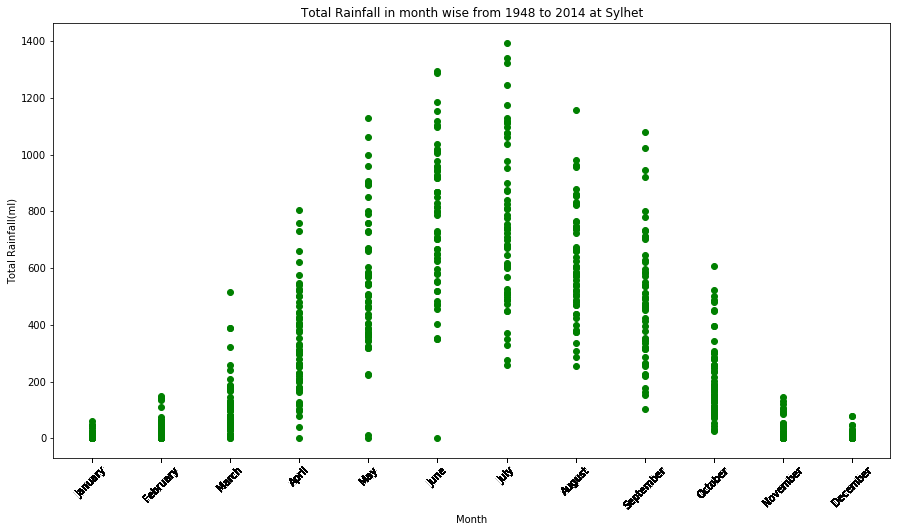

In [19]:
# month wise Rainfall from 1948 to 2014 at Sylhet


NewData=ModifiedData[(ModifiedData['Station']=='Sylhet')].copy()

print(NewData)

plt.figure(figsize=(15,8))

plt.scatter(NewData['Month'],NewData['TotalRainFall'],c="green")

plt.xticks(NewData['Month'], labels=NewData['Month'], rotation=45)

plt.title("Total Rainfall in month wise from 1948 to 2014 at Sylhet")

plt.xlabel("Month")

plt.ylabel("Total Rainfall(ml)")

plt.show()


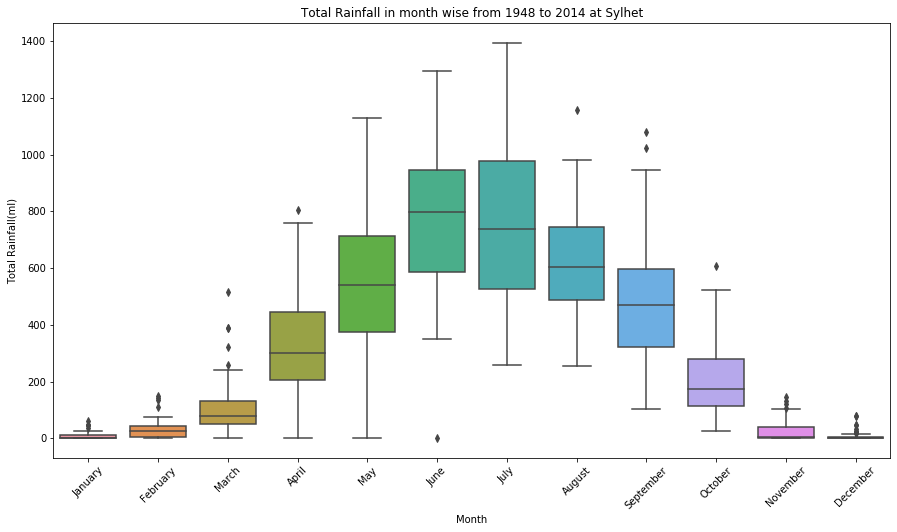

In [20]:
plt.figure(figsize=(15,8))

ax=sns.boxplot(x=NewData['Month'],y=NewData['TotalRainFall'])

plt.setp(ax.get_xticklabels(), rotation=45)

plt.title("Total Rainfall in month wise from 1948 to 2014 at Sylhet")

plt.xlabel("Month")

plt.ylabel("Total Rainfall(ml)")

plt.show()

In [21]:
# So, July is the month with the most rainfall in Sylhet

In [22]:
#Month wise total mean Rainfall from 1948 to 2014
GrpMonthWise=ModifiedData[['Station','Month','TotalRainFall']].groupby(['Station','Month']).mean()

GrpMonthWise=GrpMonthWise.reset_index()

print(GrpMonthWise)

          Station      Month  TotalRainFall
0    Ambagan(ctg)      April      98.687500
1    Ambagan(ctg)     August     463.666667
2    Ambagan(ctg)   December      12.466667
3    Ambagan(ctg)   February       8.062500
4    Ambagan(ctg)    January       6.000000
..            ...        ...            ...
415        Teknaf      March      13.289474
416        Teknaf        May     287.342105
417        Teknaf   November      67.405405
418        Teknaf    October     250.162162
419        Teknaf  September     442.378378

[420 rows x 3 columns]


In [23]:
#Now I create a dataframe which describes maximum mean rainfall in each month( from 1948 to 2014 ) and where the area(station) is located.
#If more than one area(station) is found ,I show only one.
All_Month = ["January","February","March","April","May","June","July","August","September","October","November","December"]

StationArray = []

MaxRainFallArray = []

for m in All_Month:
    mx = GrpMonthWise[GrpMonthWise['Month']==m]['TotalRainFall'].max()
    
    GetStation = GrpMonthWise[GrpMonthWise['TotalRainFall']==mx]['Station']
    StationArray.append(GetStation.iloc[:0].values)
    
   # StationArray.append(GetStation.iloc[0])
    
    MaxRainFallArray.append(mx)


MaxRainMonthWise=pd.DataFrame({"Station":StationArray,"Month":All_Month,"MaxMeanRainFall":MaxRainFallArray},index=range(len(StationArray)))

print(MaxRainMonthWise)


   Station      Month  MaxMeanRainFall
0       []    January        11.666667
1       []   February        31.051724
2       []      March       112.017241
3       []      April       333.344828
4       []        May       554.982759
5       []       June       952.921053
6       []       July      1056.567568
7       []     August       875.108108
8       []  September       487.508772
9       []    October       257.950000
10      []   November        68.378788
11      []   December        13.109091


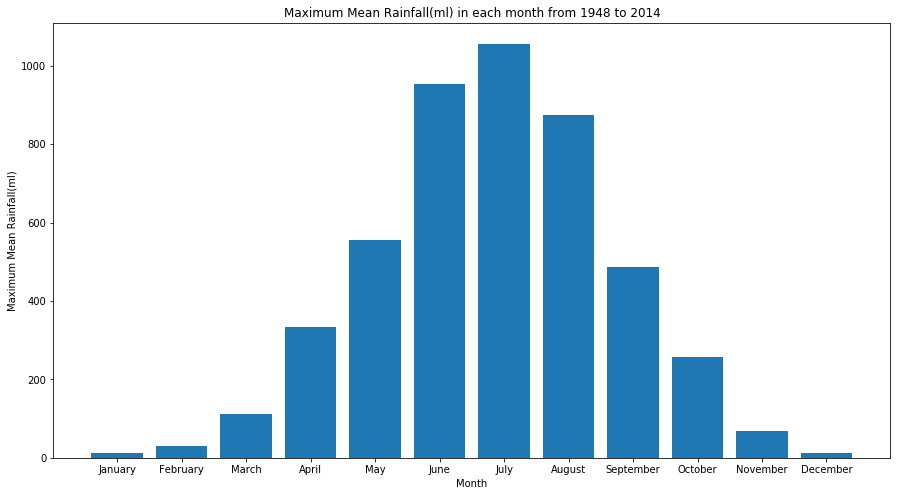

In [24]:
plt.figure(figsize=(15,8))
plt.bar(MaxRainMonthWise['Month'],MaxRainMonthWise['MaxMeanRainFall'])

plt.title("Maximum Mean Rainfall(ml) in each month from 1948 to 2014")

plt.ylabel("Maximum Mean Rainfall(ml)")

plt.xlabel("Month")

plt.show()

In [25]:
#Machine Learning Approach



In [26]:
#data types of ModifiedData
ModifiedData.dtypes

Station           object
Year               int64
Month             object
MaxRainFall        int64
TotalRainFall      int64
AvgRainFall      float64
dtype: object

In [27]:
StationConverter={}
conv=100 

# for x in all_station:

for x in Station:
    StationConverter[x]=conv;
    conv+=100
    
# for x in all_station:

for x in Station:
    print("Station = {} = {}".format(x,StationConverter[x]))


    


Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station = Ambagan(ctg) = 18600
Station 

Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800
Station = Bogra = 232800


Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chuadanga = 391800
Station = Chua

Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600
Station = Dhaka = 621600


Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur = 771600
Station = Faridpur =

Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
Station = Ishurdi = 936600
S

Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
Station = Khulna = 1140000
S

Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = Madaripur = 1296600
Station = 

Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajshahi = 1509000
Station = Rajs

Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 1645800
Station = Rangpur = 

Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = Srimangal = 1902600
Station = 

Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 2032800
Station = Tangail = 

In [28]:
ModifiedData['StationToNumber']=[StationConverter[x] for x in ModifiedData['Station']]

In [29]:
print(ModifiedData)

            Station  Year     Month  MaxRainFall  TotalRainFall  AvgRainFall  \
0      Ambagan(ctg)  1999   January            0              0     0.000000   
1      Ambagan(ctg)  1999  February            0              0     0.000000   
2      Ambagan(ctg)  1999     March            1              1     0.032258   
3      Ambagan(ctg)  1999     April            0              0     0.000000   
4      Ambagan(ctg)  1999       May          114            403    13.000000   
...             ...   ...       ...          ...            ...          ...   
20773        Teknaf  2014  February           13             22     0.785714   
20774        Teknaf  2014     March            0              0     0.000000   
20775        Teknaf  2014     April            1              1     0.033333   
20776        Teknaf  2014       May           30             78     2.516129   
20777        Teknaf  2014      June          165            887    29.566667   

       StationToNumber  
0             

In [30]:
 def ConvertMonthToNumber(x):

    if(x=='January'):
        return 1
    elif(x=='February'):
        return 2
    elif(x=="March"):
        return 3
    elif(x=="April"):
        return 4
    elif(x=="May"):
        return 5
    elif(x=="June"):
        return 6
    elif(x=="July"):
        return 7
    elif(x=="August"):
        return 8
    elif(x=="September"):
        return 9
    elif(x=="October"):
        return 10
    elif(x=="November"):
        return 11
    elif(x=="December"):
        return 12
    else:
        return x


In [31]:
ModifiedData['MonthToNumber']=[ConvertMonthToNumber(x) for x in ModifiedData['Month']]

In [32]:
ModifiedData['MonthToNumber']

0        1
1        2
2        3
3        4
4        5
        ..
20773    2
20774    3
20775    4
20776    5
20777    6
Name: MonthToNumber, Length: 20778, dtype: int64

In [33]:
ModifiedData # Modifying Data after preprocessing and cleaning

 # from sklearn.preprocessing import OneHotEncodern
 # ohe=OneHotEncodern(sparse=False) 

 # ohe.fit_transform(ModifiedData[['AvgRainFall']])




,Station,Year,Month,MaxRainFall,TotalRainFall,AvgRainFall,StationToNumber,MonthToNumber
0,Ambagan(ctg),1999,January,0,0,0.000000,18600,1
1,Ambagan(ctg),1999,February,0,0,0.000000,18600,2
2,Ambagan(ctg),1999,March,1,1,0.032258,18600,3
3,Ambagan(ctg),1999,April,0,0,0.000000,18600,4
4,Ambagan(ctg),1999,May,114,403,13.000000,18600,5
...,...,...,...,...,...,...,...,...
20773,Teknaf,2014,February,13,22,0.785714,2077800,2
20774,Teknaf,2014,March,0,0,0.000000,2077800,3
20775,Teknaf,2014,April,1,1,0.033333,2077800,4
20776,Teknaf,2014,May,30,78,2.516129,2077800,5


In [34]:
### Trainning Data

In [35]:
 data_X=ModifiedData[['Year','MonthToNumber','TotalRainFall']] # Feature 



data_Y=ModifiedData['AvgRainFall'] #Target

 data_X

# data_Y


,Year,MonthToNumber,TotalRainFall
0,1999,1,0
1,1999,2,0
2,1999,3,1
3,1999,4,0
4,1999,5,403
...,...,...,...
20773,2014,2,22
20774,2014,3,0
20775,2014,4,1
20776,2014,5,78


In [36]:
data_Y

0         0.000000
1         0.000000
2         0.032258
3         0.000000
4        13.000000
           ...    
20773     0.785714
20774     0.000000
20775     0.033333
20776     2.516129
20777    29.566667
Name: AvgRainFall, Length: 20778, dtype: float64

In [37]:
#####  X AND Y #####